# THE SPARKS FOUNDATION            @ GRIPNOVEMBER2021

## TASK 1 - Prediction using Supervised ML

### PROBLEM STATEMENT - To predict the percentage of marks of students based on the number of study hours

### Author - Sparsh Lakhani

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [3]:
# reading the data
data = pd.read_csv('http://bit.ly/w-data')
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [11]:
#check if there any null value in the dataset
data.isnull == True

False

#### There is no null value in the Dataset 

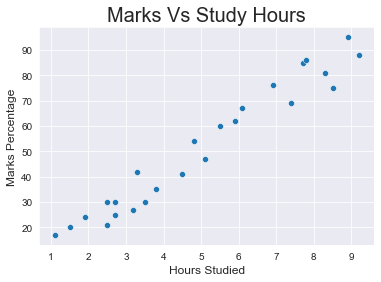

In [4]:
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

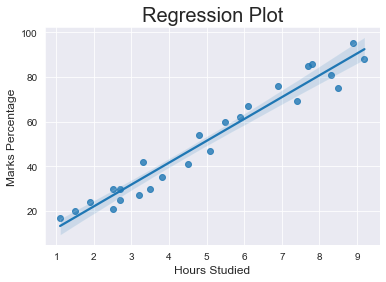

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [5]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

#### The variables are positively correlated

## Training the Model

### 1) splitting the Data

In [7]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

### 2) Fitting the Data into model

In [8]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print(" The Model is Trained")

 The Model is Trained


### 3) predicting the percentage of marks

In [9]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [10]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
print('Actual Marks v/s Predicted Marks')
compare_scores

Actual Marks v/s Predicted Marks


,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


### 4)  Visually Comparing the Predicted Marks with the Actual Marks

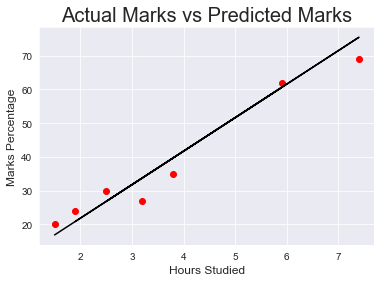

In [12]:
plt.scatter(x=val_X, y=val_y, color='Red')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual Marks vs Predicted Marks', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

### 5) Evaluating the model

In [13]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502486


## Problem statement - What will be the predicted score if a student studies for 9.25 hrs/ day?

In [14]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


### The student will score 93.893 marks if they study for 9.25hrs/day